Задание 1:
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
from sklearn.datasets import load_boston

In [22]:
boston = load_boston()

In [23]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [24]:
data = boston.data

In [25]:
target = boston.target

In [26]:
feature_names = boston.feature_names

In [27]:
x = pd.DataFrame(data, columns=feature_names)
x.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
y = pd.DataFrame(target, columns=['price'])
y.head(5)

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled =
pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [33]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

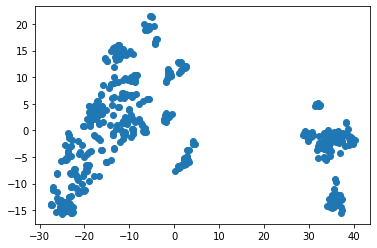

In [34]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

Задание 2:
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state = 42, max_iter=100)

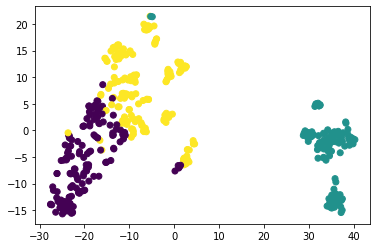

In [36]:
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [37]:
y_train[labels_train == 0].mean()

price    26.836879
dtype: float64

In [38]:
y_train[labels_train == 1].mean()

price    16.187379
dtype: float64

In [39]:
y_train[labels_train == 2].mean()

price    23.490625
dtype: float64

In [40]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.0965229078014185
Кластер 1: 12.927381747572817
Кластер 2: 0.7059768750000002


*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


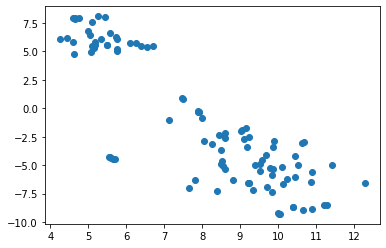

In [51]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1])
plt.show()

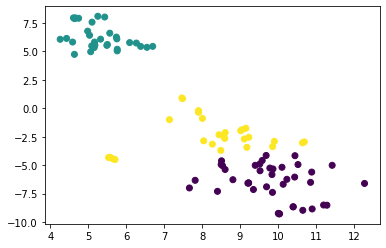

In [52]:
label_train = kmeans.fit_predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=label_train)
plt.show()

In [55]:
y_test[labels_train == 0].mean()

price    26.741463
dtype: float64

In [56]:
y_test[labels_train == 1].mean()

price    16.816129
dtype: float64

In [57]:
y_test[labels_train == 2].mean()

price    19.136667
dtype: float64

In [58]:
print('Кластер 0: {}'.format(X_test.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.12016536585365852
Кластер 1: 11.389174193548389
Кластер 2: 0.4121796666666666
